In [1]:
import keras
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Mnist data loading

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train, X_test = X_train.astype('float32') / 255, X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

X_train_noisy = X_train + np.random.randn(len(X_train), X_train.shape[1])
X_test_noisy = X_test + np.random.randn(len(X_test), X_train.shape[1])

## Build a denoising autoencoder

In [4]:
auto_inputs = keras.Input((784,))
encoder = keras.layers.Dense(784, activation='relu')(auto_inputs)
decoder = keras.layers.Dense(784, activation='sigmoid')(encoder)

autoencoder = keras.Model(auto_inputs, decoder)
decoder_layer = autoencoder.layers[-1]
encoder_out = keras.Input((784,))
encoder = keras.Model(auto_inputs, encoder)
decoder = keras.Model(encoder_out, decoder_layer(encoder_out))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='binary_crossentropy')
autoencoder.fit(X_train_noisy, X_train, epochs=20, batch_size=256, validation_data=(X_test_noisy, X_test))



Epoch 1/20


235/235 [==============================] - 6s 20ms/step - loss: 0.1994 - binary_crossentropy: 0.1994 - val_loss: 0.1600 - val_binary_crossentropy: 0.1600
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1535 - binary_crossentropy: 0.1535 - val_loss: 0.1520 - val_binary_crossentropy: 0.1520
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1454 - binary_crossentropy: 0.1454 - val_loss: 0.1494 - val_binary_crossentropy: 0.1494
Epoch 4/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1405 - binary_crossentropy: 0.1405 - val_loss: 0.1483 - val_binary_crossentropy: 0.1483
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1369 - binary_crossentropy: 0.1369 - val_loss: 0.1484 - val_binary_crossentropy: 0.1484
Epoch 6/20
235/235 [==============================] - 5s 19ms/step - loss: 0.1340 - binary_crossentropy: 0.1340 - val_loss: 0.1488 - val_binary_crossentropy: 0.1488
Epoch 

313/313 [==============================] - 1s 2ms/step


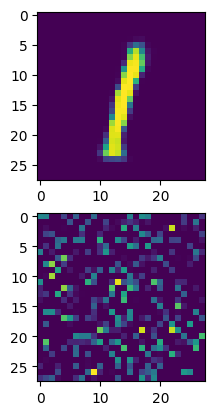

In [6]:
encoded_imgs = encoder.predict(X_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

plt.subplot(211)
plt.imshow(decoded_imgs[5].reshape(28, 28))
plt.subplot(212)
plt.imshow(encoded_imgs[5].reshape(28, 28))
plt.show()